In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
%matplotlib inline

In [2]:
a = 0.7
b = 0.6

In [3]:
X = np.arange(0,2.4,0.2)
Y = np.arange(0,2.4,0.2)
m,p =  np.meshgrid(X,Y)
mdot = np.divide(1,1+np.square(p))- np.multiply(b,m)
pdot = np.subtract(m,np.multiply(a,p))

Text(0, 0.5, 'm')

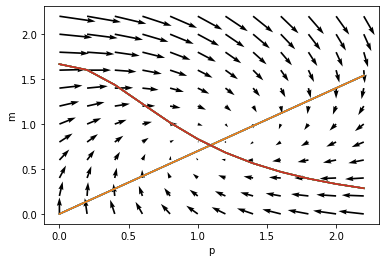

In [4]:
fig, ax = plt.subplots()
q = ax.quiver(p,m,pdot,mdot)
ax.quiverkey(q, X=0.3, Y=2.4, U=5,
             label='Quiver key, length = 5', labelpos='E')
ax.plot(p,np.multiply(a,p))
ax.plot(p, np.divide( 1, np.multiply(b,(1+np.square(p)))))
ax.set_xlabel('p')
ax.set_ylabel('m')

In [5]:
def dydt_autoinhib(t,y,a,b):
    y1, y2 = y
    dy1 = 1/(1+y2**2)-b*y1
    dy2 = y1-a*y2
    return (dy1,dy2)

# lambda trick so we can pass the right function into the solver
dydt_params = lambda t,y: dydt_autoinhib(t,y,a,b)

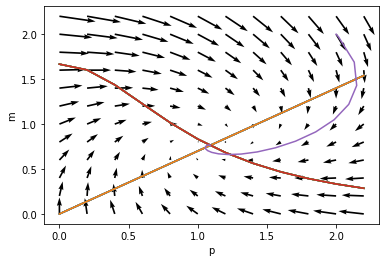

In [6]:

solution1 = scipy.integrate.solve_ivp(dydt_params, t_span=(0,20), y0=(2,2), method='RK45', rtol=1e-6)
t1_ode45 = solution1.t
m1_ode45 = solution1.y[0]
p1_ode45 = solution1.y[1]

fig, ax = plt.subplots()
q = ax.quiver(p,m,pdot,mdot)
ax.quiverkey(q, X=0.3, Y=2.4, U=5,
             label='Quiver key, length = 5', labelpos='E')
ax.plot(p,np.multiply(a,p))
ax.plot(p, np.divide( 1, np.multiply(b,(1+np.square(p)))))
ax.set_xlabel('p')
ax.set_ylabel('m')

ax.plot(p1_ode45,m1_ode45)
plt.show()

All done!